**Ques1.** What is our independent variable? What is our dependent variable?

<b>Ans1.</b> Time to complete each test or the 'reaction time' is the dependent variable and the independent variable is whether the word is congruent or not. 
There are a few other variables like color choices, font and size, length of the word, number of words in the list etc 
which we need to control. For this experiment, we are making an assumption that the lurking variables are controlled

**Ques2.** What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?
Justify your choices.

**Ans2.** Null hypotheses or H0 is that both the congruent and the incongruent word conditions will take the same time(µc = µi) where µc is the estimated mean of _congruent population_ and µi is the mean of _incongruent population_. The alternate hypotheses or HA is that they are statistically different(µc ≠ µi).
We will perform dependent Two-Tailed t-test for dependent samples since both tests are performed with same participants. Paired t-test tests whether the mean of the differences between dependent or paired observations is equal to a target value. We are using t-test as the sample size is less than 30 and we do not know the population mean and standard deviation.

                            H0: µc = µi at α = 0.05, 
                            HA: µc ≠ µi at α = 0.05, where α is the t-critical at which the probability is .05 and µc and µi are population means for congruent and incongruent group respectively.

**Ques3.** Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency 
and at least one measure of variability.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
import plotly as py

In [4]:
dt = pd.read_csv('Stroop.csv')

In [5]:
dt.describe()

,Congruent,Incongruent,X
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,12.500000
std,3.559358,4.797057,7.071068
min,8.630000,15.687000,1.000000
25%,11.895250,18.716750,6.750000
50%,14.356500,21.017500,12.500000
75%,16.200750,24.051500,18.250000
max,22.328000,35.255000,24.000000


**Ans3.** Measure of central tendency: Mean for congruent set is **14.051125** and incongruent set is **22.015917**, Differences in mean is **7.96479**

Measure of variability: Standard Deviation for congruent set is **3.559358** and incongruent set is **4.797057**, Variance is	**12.66902907** and **23.01175704** respectively

**Ques4.** Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


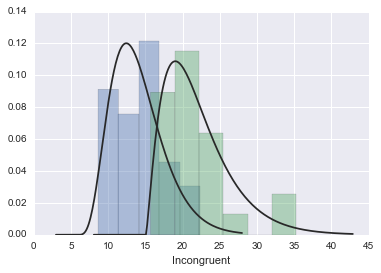

In [6]:
%pylab inline
sns.distplot(dt.Congruent, kde=False, fit=stats.gamma);
sns.distplot(dt.Incongruent, kde=False, fit=stats.gamma);

The blue histogram is for congruent and the green is for incongruent response times. The spread of incongruent is more than that of congruent. Congruent has its mode around 12 sec and incongruent around 20. The distribution is mildly normal.

In [7]:
dt2 = pd.read_csv('Stroop_2.csv')

For categorical analysis, I have summarized the data in single column: Response_Time and identified each one of them as 'Congruent' or 'Incongruent'. I also added X column with values 1 to 48 for indexing. It is the same data, just transformed so that we can make box plots and scatter plots by condition

In [8]:
dt2.head()

,Response_Time,Condition,X
0,8.630,Congruent,1
1,8.987,Congruent,2
2,9.401,Congruent,3
3,9.564,Congruent,4
4,10.639,Congruent,5


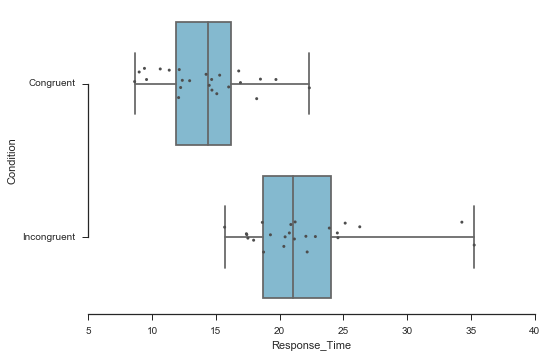

In [9]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="Response_Time", y="Condition", data=dt2,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="Response_Time", y="Condition", data=dt2,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

Box plot of Congruent has tighter distribution than Incongruent test mainly due to high fliers around 35 sec for Incongruent condition. Median for Congruent condition is around 14.5 and for Incongruent, its at 21. We have already calculated means for the two conditions and it is supported by this chart that congruent has mean a lot lower than incongruent

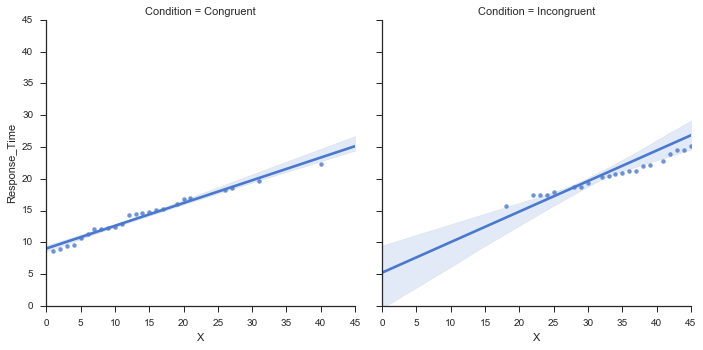

In [10]:
g = sns.lmplot(x= "X", y="Response_Time", col="Condition", data=dt2);
g.set(xlim=(0, 45), ylim=(0, 45))

Next is the scatter plot for the the Response_Times for both the conditions, Incongruent condition shows higher response times and steeper slope than Congruent

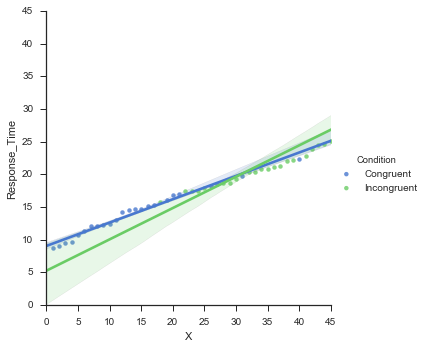

In [11]:
g = sns.lmplot(x= "X", y="Response_Time", hue="Condition", data=dt2);
g.set(xlim=(0, 45), ylim=(0, 45))

Here I plotted both of them on the same chart to show slope comparison

**Ques5.** Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [14]:
from scipy import stats
paired_sample = stats.ttest_rel(dt.Congruent, dt.Incongruent)
print ("t-statistic: %.3f and p-value : %.9f." % paired_sample)

t-statistic: -8.021 and p-value : 0.000000041.


**Ans5**

                            t-Test:
                            t-critical: 2.069
                            Avg Mean Difference between the two conditions: -7.964791667
                            Standard error: 0.993028635
                            t-statistic: -8.021
                            p-value: 4.1E-08
                            Confidence Interval: (-10.01, -5.90548)
                            Conclusion: Reject the null!
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the difference between congruence and incongruence response time difference is statistically significant.
The results matched up with my expectations as I spent more time reading the incongruent words than congruent and in other words, observed stroop effect

**Ques6.** Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The stroop effect occurs because our brain reads effortlessly and identifying color requires more cognitive effort. It would be easier for a child who can not read and does not know meaningfulness of words.
Some Stroop effect tests that might produce similar effect would be: rotate words, or arrange the letters in a clockwise or counterclockwise pattern, scramble the letters

**References:**

Stroop effect - Wikipedia

https://docs.scipy.org/doc/

http://seaborn.pydata.org/

[hypothesis testing- Minitab Support](http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/)
    